In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#checking for na values
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler
numerical_features = ["Age", "EstimatedSalary"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [8]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
r2score

0.4505494505494506

In [41]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [42]:
X_train.shape

(320, 2)

# SGD

In [64]:
def SGD(X,y,lr=0.01, epochs=50):
    m,n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []
    X = X.values
    y = y.values
    for epoch in range(epochs):
        total_loss = 0
        for i in range(m):
            rand_ind = np.random.randint(m)
            xi = X[rand_ind,:].reshape(1,-1)
            yi=y[rand_ind]
            z = np.dot(xi, weights)
            h = sigmoid(z)
            grad = np.dot(xi.T,(h-yi))
            weights -= lr*grad
            loss = -np.mean(yi*np.log(h) + (1-yi)* np.log(1-h))
            total_loss +=loss
        avg = total_loss/m
        losses.append(avg)
        print(f"Loss after epoch {epoch+1} is: {avg}")
    return weights,losses
    
def predict(X, weights):
    z = np.dot(X,weights)
    return np.round(sigmoid(z))

weights, loss_sgd = SGD(X_train, y_train)
y_pred_sgd = predict(X_test,weights)
y_pred_sgd = [int(i) for i in y_pred]
set(y_pred)

Loss after epoch 1 is: 0.6011389364098664
Loss after epoch 2 is: 0.5033308279389423
Loss after epoch 3 is: 0.5093350123992106
Loss after epoch 4 is: 0.4293171908128022
Loss after epoch 5 is: 0.46057886058670644
Loss after epoch 6 is: 0.4143955354354912
Loss after epoch 7 is: 0.39984245556201353
Loss after epoch 8 is: 0.5009452183344419
Loss after epoch 9 is: 0.41743456769764126
Loss after epoch 10 is: 0.43963618675586896
Loss after epoch 11 is: 0.4269942362592113
Loss after epoch 12 is: 0.42569724656702845
Loss after epoch 13 is: 0.44253508069469005
Loss after epoch 14 is: 0.4603948397229011
Loss after epoch 15 is: 0.42738085674079773
Loss after epoch 16 is: 0.4627965939027286
Loss after epoch 17 is: 0.42881598593999987
Loss after epoch 18 is: 0.48822485639939284
Loss after epoch 19 is: 0.4560832860678353
Loss after epoch 20 is: 0.4590692515188376
Loss after epoch 21 is: 0.43267674304484754
Loss after epoch 22 is: 0.39041728552660904
Loss after epoch 23 is: 0.41482509409534274
Loss aft

{0, 1}

In [65]:
abs(loss_sgd[49] - loss_sgd[48])

0.02201645432555266

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [61]:
confusion_matrix(y_test, y_pred_sgd)

array([[50,  2],
       [ 8, 20]], dtype=int64)

In [62]:
accuracy_score(y_test, y_pred_sgd)

0.875

In [48]:
precision_score(y_test, y_pred_sgd)

0.9090909090909091

In [49]:
recall_score(y_test, y_pred_sgd)

0.7142857142857143

In [50]:
f1_score(y_test, y_pred_sgd)

0.8

In [51]:
confusion_matrix(y_test, y_pred_sgd)

array([[50,  2],
       [ 8, 20]], dtype=int64)

In [52]:
c1 = model.predict_proba(X_test)[:,1]
fpr,tpr, thres = roc_curve(y_test,y_pred_sgd)
print(f"roc auc score: {roc_auc_score(y_test,c1)}")

roc auc score: 0.9684065934065934


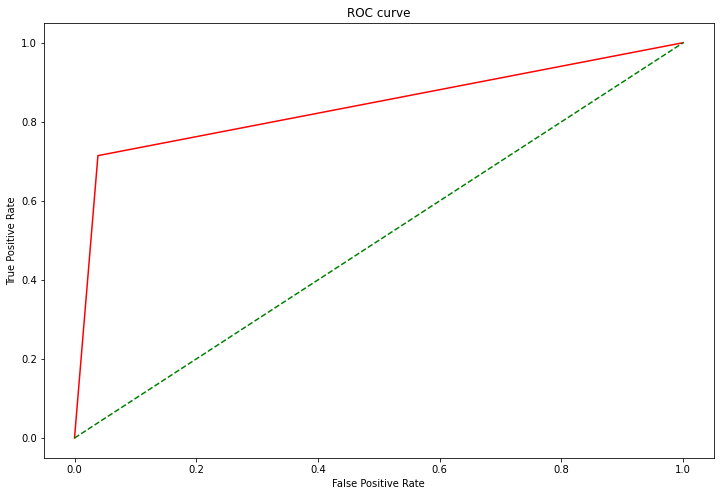

In [53]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

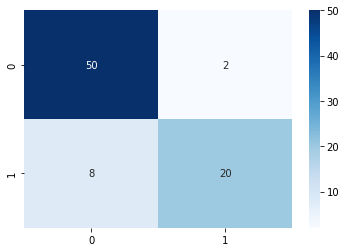

In [54]:
cm = confusion_matrix(y_test,y_pred_sgd)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

In [55]:
x = X.values
x[0].reshape(1,-1)

array([[-1.78179743, -1.49004624]])